In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

--2021-12-01 08:54:50--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-01 08:54:50--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-01 08:54:50--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [3]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

   
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump


import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import GRU, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, ELU, ReLU
from tensorflow.keras import Sequential, regularizers
from tensorflow.python.client import device_lib

### Importing all the required library ###
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from numpy import array
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense ,LeakyReLU
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, Conv2D ,Conv3D ,Conv2DTranspose,Conv1DTranspose
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# import talib as ta
import csv
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '14tq-d8l_JLtQkZDCDBMSq-WQ-vDkUd4t'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_CAD_M30.csv') 
# df =  pd.read_csv('AUD_CAD_M15.csv')

id = '12p2owDfxmtYEuYo0QbLzYArPVJZHqwBp'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_CAD_M15.csv')

id = '1RhrCpSvr3rBAWL6WVebi1WWOcoj9yLn9'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_CAD_H4.csv')

id = '1e_CDKiWaVSrWkCVbFyy6fSmo_GsF7YoA'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_CAD_H1.csv')



# Dataset fill

## 15M

In [4]:
dataset_M15 = pd.read_csv('AUD_CAD_M15.csv', parse_dates=[0], index_col=0)
dataset_M15.index

DatetimeIndex(['2005-01-02 18:45:00+00:00', '2005-01-02 19:15:00+00:00',
               '2005-01-02 19:30:00+00:00', '2005-01-02 19:45:00+00:00',
               '2005-01-02 20:00:00+00:00', '2005-01-02 20:15:00+00:00',
               '2005-01-02 20:30:00+00:00', '2005-01-02 20:45:00+00:00',
               '2005-01-02 21:00:00+00:00', '2005-01-02 21:15:00+00:00',
               ...
               '2021-07-30 18:30:00+00:00', '2021-07-30 18:45:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:15:00+00:00',
               '2021-07-30 19:30:00+00:00', '2021-07-30 19:45:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:15:00+00:00',
               '2021-07-30 20:30:00+00:00', '2021-07-30 20:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=417932, freq=None)

In [5]:
t_index_M15 = pd.date_range('2005-01-02 18:45:00+00:00',  '2021-07-30 20:45:00+00:00', freq='15T')  
dataset_M15 = dataset_M15.reindex(t_index_M15)

In [6]:
dataset_M15 = dataset_M15.reset_index(level=0)
dataset_M15 = dataset_M15.rename(columns={'index':'datetime'})

In [7]:
ful_data0_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 0]  
ful_data1_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 1]
ful_data2_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 2]
ful_data3_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 3]
ful_data4_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 4]
ful_data4_M15 = ful_data4_M15[ful_data4_M15['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 6]
ful_data6_M15 = ful_data6_M15[ful_data6_M15['datetime'].dt.hour.isin(np.arange(21, 24))]

In [8]:
ful_data_M15 = pd.concat([ful_data0_M15, ful_data1_M15, ful_data2_M15, ful_data3_M15, ful_data4_M15, ful_data6_M15])
ful_data_M15 = ful_data_M15.sort_values(by = 'datetime')

In [9]:
ful_data_M15 = ful_data_M15.reset_index()
ful_data_M15 = ful_data_M15.drop(labels='index',axis=1)

In [10]:
ful_data_M15 = ful_data_M15.pad()  
ful_data_M15

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.93936,0.93936,0.93874,0.93910
1,2005-01-02 21:15:00+00:00,0.93874,0.93874,0.93822,0.93848
2,2005-01-02 21:30:00+00:00,0.93840,0.93858,0.93822,0.93858
3,2005-01-02 21:45:00+00:00,0.93848,0.93892,0.93848,0.93858
4,2005-01-02 22:00:00+00:00,0.93874,0.93910,0.93830,0.93830
...,...,...,...,...,...
418651,2021-07-30 19:45:00+00:00,0.91522,0.91575,0.91464,0.91574
418652,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91586
418653,2021-07-30 20:15:00+00:00,0.91588,0.91596,0.91550,0.91551
418654,2021-07-30 20:30:00+00:00,0.91552,0.91554,0.91490,0.91551


In [11]:
np.any(ful_data_M15.isnull())

False

## 30M

In [12]:
dataset_M30 = pd.read_csv('AUD_CAD_M30.csv', parse_dates=[0], index_col=0)
dataset_M30.index

DatetimeIndex(['2005-01-02 18:30:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 19:30:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:30:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:30:00+00:00', '2005-01-02 22:00:00+00:00',
               '2005-01-02 22:30:00+00:00', '2005-01-02 23:00:00+00:00',
               ...
               '2021-07-30 16:00:00+00:00', '2021-07-30 16:30:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 17:30:00+00:00',
               '2021-07-30 18:00:00+00:00', '2021-07-30 18:30:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:30:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=209730, freq=None)

In [13]:
t_index_M30 = pd.date_range('2005-01-02 18:30:00+00:00',  '2021-07-30 20:30:00+00:00', freq='30T')
dataset_M30 = dataset_M30.reindex(t_index_M30)

In [14]:
dataset_M30 = dataset_M30.reset_index(level=0)
dataset_M30 = dataset_M30.rename(columns={'index':'datetime'})

In [15]:
ful_data0_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 0]  
ful_data1_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 1]
ful_data2_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 2]
ful_data3_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 3]
ful_data4_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 4]
ful_data4_M30 = ful_data4_M30[ful_data4_M30['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 6]
ful_data6_M30 = ful_data6_M30[ful_data6_M30['datetime'].dt.hour.isin(np.arange(21, 24))]

In [16]:
ful_data_M30 = pd.concat([ful_data0_M30, ful_data1_M30, ful_data2_M30, ful_data3_M30, ful_data4_M30, ful_data6_M30])
ful_data_M30 = ful_data_M30.sort_values(by = 'datetime')

In [17]:
ful_data_M30 = ful_data_M30.reset_index()
ful_data_M30 = ful_data_M30.drop(labels='index',axis=1)

In [18]:
ful_data_M30 = ful_data_M30.pad()
ful_data_M30

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.93936,0.93936,0.93822,0.93848
1,2005-01-02 21:30:00+00:00,0.93840,0.93892,0.93822,0.93858
2,2005-01-02 22:00:00+00:00,0.93874,0.93910,0.93813,0.93892
3,2005-01-02 22:30:00+00:00,0.93936,0.94007,0.93910,0.94007
4,2005-01-02 23:00:00+00:00,0.94016,0.94158,0.93980,0.94158
...,...,...,...,...,...
209323,2021-07-30 18:30:00+00:00,0.91582,0.91587,0.91528,0.91540
209324,2021-07-30 19:00:00+00:00,0.91538,0.91558,0.91510,0.91528
209325,2021-07-30 19:30:00+00:00,0.91528,0.91575,0.91464,0.91574
209326,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91551


## 1H

In [19]:
dataset_H1 = pd.read_csv('AUD_CAD_H1.csv', parse_dates=[0], index_col=0)
dataset_H1.index

DatetimeIndex(['2005-01-02 18:00:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 20:00:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 22:00:00+00:00', '2005-01-02 23:00:00+00:00',
               '2005-01-03 00:00:00+00:00', '2005-01-03 01:00:00+00:00',
               '2005-01-03 02:00:00+00:00', '2005-01-03 03:00:00+00:00',
               ...
               '2021-07-30 11:00:00+00:00', '2021-07-30 12:00:00+00:00',
               '2021-07-30 13:00:00+00:00', '2021-07-30 14:00:00+00:00',
               '2021-07-30 15:00:00+00:00', '2021-07-30 16:00:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 18:00:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=105546, freq=None)

In [20]:
t_index_H1 = pd.date_range('2005-01-02 18:00:00+00:00',  '2021-07-30 20:00:00+00:00', freq='1H')
dataset_H1 = dataset_H1.reindex(t_index_H1)

In [21]:
dataset_H1 = dataset_H1.reset_index(level=0)
dataset_H1 = dataset_H1.rename(columns={'index':'datetime'})

In [22]:
ful_data0_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 0]  
ful_data1_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 1]
ful_data2_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 2]
ful_data3_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 3]
ful_data4_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 4]
ful_data4_H1 = ful_data4_H1[ful_data4_H1['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 6]
ful_data6_H1 = ful_data6_H1[ful_data6_H1['datetime'].dt.hour.isin(np.arange(21, 24))]

In [23]:
ful_data_H1 = pd.concat([ful_data0_H1, ful_data1_H1, ful_data2_H1, ful_data3_H1, ful_data4_H1, ful_data6_H1])
ful_data_H1 = ful_data_H1.sort_values(by = 'datetime')

In [24]:
ful_data_H1 = ful_data_H1.reset_index()
ful_data_H1 = ful_data_H1.drop(labels='index',axis=1)

In [25]:
ful_data_H1 = ful_data_H1.pad()
ful_data_H1

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.93936,0.93936,0.93822,0.93858
1,2005-01-02 22:00:00+00:00,0.93874,0.94007,0.93813,0.94007
2,2005-01-02 23:00:00+00:00,0.94016,0.94193,0.93980,0.94051
3,2005-01-03 00:00:00+00:00,0.94069,0.94104,0.93919,0.94016
4,2005-01-03 01:00:00+00:00,0.94020,0.94198,0.94002,0.94074
...,...,...,...,...,...
104659,2021-07-30 16:00:00+00:00,0.91636,0.91678,0.91601,0.91610
104660,2021-07-30 17:00:00+00:00,0.91611,0.91624,0.91528,0.91600
104661,2021-07-30 18:00:00+00:00,0.91600,0.91612,0.91528,0.91540
104662,2021-07-30 19:00:00+00:00,0.91538,0.91575,0.91464,0.91574


# TA indicator

In [26]:
import talib as ta


def get_technical_indicators(data, timeperiod = 10):
    data['wma']=ta.WMA(data.close,timeperiod=timeperiod)
    data['ema']=ta.EMA(data.close,timeperiod=timeperiod)
    data['midpoint']=ta.MIDPOINT(data.close,timeperiod=timeperiod)
    data['sma']=ta.SMA(data.close,timeperiod=timeperiod)
    data['tema']=ta.TEMA(data.close,timeperiod=timeperiod)
    data['ma']=ta.MA(data.close,timeperiod=timeperiod)
    data['kama']=ta.KAMA(data.close,timeperiod=timeperiod)
    data['rocr']=ta.ROCR(data.close,timeperiod=timeperiod)
    data['DEMA']=ta.DEMA(data.close,timeperiod=timeperiod)
    data['TRIMA']=ta.TRIMA(data.close,timeperiod=timeperiod)
    data['LINEARREG']=ta.LINEARREG(data.close,timeperiod=timeperiod)
    data['TSF']=ta.TSF(data.close,timeperiod=timeperiod)


    return data

#AUD_CAD_H1 data scale

In [27]:
df = ful_data_H1

In [28]:
df = df.tail(20000).reset_index(drop=True)


In [29]:
data = get_technical_indicators(df)
data = data.iloc[30:,:].reset_index(drop=True)
data

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
1,2018-06-01 17:00:00+00:00,0.98052,0.98154,0.98036,0.98144,0.979101,0.979083,0.978930,0.978349,0.980767,0.978349,0.978665,1.003702,0.979880,0.978035,0.980605,0.981106
2,2018-06-01 18:00:00+00:00,0.98145,0.98209,0.98112,0.98168,0.979707,0.979555,0.979050,0.978759,0.981517,0.978759,0.979090,1.004194,0.980593,0.978618,0.981602,0.982233
3,2018-06-01 19:00:00+00:00,0.98169,0.98195,0.98070,0.98096,0.980107,0.979811,0.979150,0.979213,0.981641,0.979213,0.979434,1.004650,0.980869,0.979245,0.981894,0.982490
4,2018-06-01 20:00:00+00:00,0.98095,0.98211,0.98024,0.98032,0.980308,0.979903,0.979150,0.979507,0.981381,0.979507,0.979520,1.003008,0.980845,0.979804,0.981910,0.982444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2021-07-30 16:00:00+00:00,0.91636,0.91678,0.91601,0.91610,0.916750,0.917220,0.917860,0.917331,0.915880,0.917331,0.917985,0.997387,0.916037,0.917054,0.915589,0.915201
19966,2021-07-30 17:00:00+00:00,0.91611,0.91624,0.91528,0.91600,0.916508,0.916999,0.917860,0.916999,0.915748,0.916999,0.917724,0.996389,0.915849,0.916730,0.915527,0.915199
19967,2021-07-30 18:00:00+00:00,0.91600,0.91612,0.91528,0.91540,0.916217,0.916708,0.917060,0.916559,0.915423,0.916559,0.917247,0.995216,0.915529,0.916490,0.915534,0.915307
19968,2021-07-30 19:00:00+00:00,0.91538,0.91575,0.91464,0.91574,0.916069,0.916532,0.916265,0.916261,0.915394,0.916261,0.917052,0.996756,0.915424,0.916322,0.915684,0.915555


In [30]:

data_H1_ali = data
for i in range(3):
  data_H1_ali = data_H1_ali.append(data)
data_H1_ali = data_H1_ali.sort_values(by = 'datetime')
data_H1_ali = data_H1_ali.reset_index()
data_H1_ali = data_H1_ali.drop(labels='index',axis=1)

In [31]:
data_H1_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
1,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
2,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
3,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
4,2018-06-01 17:00:00+00:00,0.98052,0.98154,0.98036,0.98144,0.979101,0.979083,0.978930,0.978349,0.980767,0.978349,0.978665,1.003702,0.979880,0.978035,0.980605,0.981106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:00:00+00:00,0.91538,0.91575,0.91464,0.91574,0.916069,0.916532,0.916265,0.916261,0.915394,0.916261,0.917052,0.996756,0.915424,0.916322,0.915684,0.915555
79876,2021-07-30 20:00:00+00:00,0.91575,0.91626,0.91490,0.91606,0.916032,0.916446,0.916265,0.916181,0.915553,0.916181,0.917023,0.999127,0.915469,0.916198,0.915734,0.915635
79877,2021-07-30 20:00:00+00:00,0.91575,0.91626,0.91490,0.91606,0.916032,0.916446,0.916265,0.916181,0.915553,0.916181,0.917023,0.999127,0.915469,0.916198,0.915734,0.915635
79878,2021-07-30 20:00:00+00:00,0.91575,0.91626,0.91490,0.91606,0.916032,0.916446,0.916265,0.916181,0.915553,0.916181,0.917023,0.999127,0.915469,0.916198,0.915734,0.915635


## y scale

In [32]:
def y_size_scale(column, num_point,pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
            
        y_holder = []
        #Taking from i to i+num_point as real data
        for j in range(i,i + pred_point):
            y_holder.append(column[j])
        Y.append(y_holder)

        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    

    return array(X), array(Y)

In [33]:
num_point = 17
pred_point = 4

fake_y, real_y = y_size_scale(data_H1_ali['close'],num_point, pred_point)
H1_max_y_rows = fake_y.max(axis=1)

# fake_scaled_unshape = fake / max_of_fake_rows[:, np.newaxis]
real_scaled_unshape = real_y/H1_max_y_rows[:, np.newaxis]


# real_scaled = real_scaled_unshape.reshape((real_scaled_unshape.shape[0],1,real_scaled_unshape.shape[1]))
# fake_scaled = fake_scaled_unshape.reshape((fake_scaled_unshape.shape[0],1,fake_scaled_unshape.shape[1]))

In [34]:
fake_y.shape

(79860, 17)

In [35]:
real_y.shape

(79860, 4)

In [36]:
print(real_scaled_unshape.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## Feature

In [37]:
def feature_scale(column, num_point, pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    
    return array(X)

In [38]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_H1_ali]
feature_tem = np.zeros((real_scaled_unshape.shape[0], data_H1_ali.shape[1] - 1, num_point))
feature_tem.shape

(79860, 16, 17)

In [39]:
for i in range(data_H1_ali.shape[1] - 1):
  
  feature_fake = feature_scale(data_H1_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows = feature_fake.max(axis=1)
  fake_scaled_unshape = feature_fake / max_feature_rows[:, np.newaxis]
  feature_tem[:,i,:] = fake_scaled_unshape


In [40]:
feature_tem_top4 = feature_tem[:,:4,:]

In [41]:
np.savez('AUD_CAD_H1', AUD_CAD_H1_feature = feature_tem, AUD_CAD_H1_y = real_scaled_unshape)
np.savez('AUD_CAD_H1_top4', AUD_CAD_H1_feature_top4 = feature_tem_top4)

In [42]:
data1 = np.load('AUD_CAD_H1.npz')
data2 = np.load('AUD_CAD_H1_top4.npz')

In [43]:
data1['AUD_CAD_H1_feature'].shape

(79860, 16, 17)

In [44]:
data2['AUD_CAD_H1_feature_top4'].shape

(79860, 4, 17)

In [45]:
data1['AUD_CAD_H1_y'].shape

(79860, 4)

# AUD_CAD_30M data scale

In [46]:
df_30m = ful_data_M30

In [47]:
df_30m = df_30m.tail(40000).reset_index(drop=True)

In [48]:
data_30m = get_technical_indicators(df_30m)
data_30m = data_30m.iloc[60:,:].reset_index(drop=True)
data_30m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.97986,0.97927,0.97968,0.978932,0.978688,0.978150,0.978388,0.979890,0.978388,0.978517,1.003277,0.979423,0.978448,0.980021,0.980384
1,2018-06-01 16:30:00+00:00,0.97966,0.98060,0.97950,0.98051,0.979318,0.979020,0.978695,0.978777,0.980387,0.978777,0.978983,1.003983,0.979892,0.978843,0.980401,0.980761
2,2018-06-01 17:00:00+00:00,0.98052,0.98106,0.98036,0.98098,0.979719,0.979376,0.978930,0.979112,0.980895,0.979112,0.979413,1.003427,0.980381,0.979201,0.980932,0.981337
3,2018-06-01 17:30:00+00:00,0.98098,0.98154,0.98049,0.98144,0.980142,0.979751,0.979500,0.979568,0.981403,0.979568,0.980247,1.004668,0.980881,0.979567,0.981290,0.981673
4,2018-06-01 18:00:00+00:00,0.98145,0.98209,0.98114,0.98207,0.980597,0.980173,0.979985,0.980019,0.981983,0.980019,0.980996,1.004614,0.981442,0.979934,0.981753,0.982138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39935,2021-07-30 18:30:00+00:00,0.91582,0.91587,0.91528,0.91540,0.915913,0.916046,0.916265,0.916073,0.915582,0.916073,0.916616,0.999061,0.915492,0.916122,0.915593,0.915487
39936,2021-07-30 19:00:00+00:00,0.91538,0.91558,0.91510,0.91528,0.915769,0.915907,0.916205,0.916015,0.915402,0.916015,0.916591,0.999367,0.915339,0.915985,0.915277,0.915113
39937,2021-07-30 19:30:00+00:00,0.91528,0.91575,0.91464,0.91574,0.915719,0.915877,0.915880,0.915876,0.915503,0.915876,0.916528,0.998484,0.915387,0.915851,0.915405,0.915300
39938,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91551,0.915652,0.915810,0.915880,0.915807,0.915478,0.915807,0.916491,0.999247,0.915355,0.915757,0.915343,0.915240


In [49]:

data_30m_ali = data_30m
for i in range(1):
  data_30m_ali = data_30m_ali.append(data_30m)
data_30m_ali = data_30m_ali.sort_values(by = 'datetime')
data_30m_ali = data_30m_ali.reset_index()
data_30m_ali = data_30m_ali.drop(labels='index',axis=1)

In [50]:
data_30m_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.97986,0.97927,0.97968,0.978932,0.978688,0.978150,0.978388,0.979890,0.978388,0.978517,1.003277,0.979423,0.978448,0.980021,0.980384
1,2018-06-01 16:00:00+00:00,0.97940,0.97986,0.97927,0.97968,0.978932,0.978688,0.978150,0.978388,0.979890,0.978388,0.978517,1.003277,0.979423,0.978448,0.980021,0.980384
2,2018-06-01 16:30:00+00:00,0.97966,0.98060,0.97950,0.98051,0.979318,0.979020,0.978695,0.978777,0.980387,0.978777,0.978983,1.003983,0.979892,0.978843,0.980401,0.980761
3,2018-06-01 16:30:00+00:00,0.97966,0.98060,0.97950,0.98051,0.979318,0.979020,0.978695,0.978777,0.980387,0.978777,0.978983,1.003983,0.979892,0.978843,0.980401,0.980761
4,2018-06-01 17:00:00+00:00,0.98052,0.98106,0.98036,0.98098,0.979719,0.979376,0.978930,0.979112,0.980895,0.979112,0.979413,1.003427,0.980381,0.979201,0.980932,0.981337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:30:00+00:00,0.91528,0.91575,0.91464,0.91574,0.915719,0.915877,0.915880,0.915876,0.915503,0.915876,0.916528,0.998484,0.915387,0.915851,0.915405,0.915300
79876,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91551,0.915652,0.915810,0.915880,0.915807,0.915478,0.915807,0.916491,0.999247,0.915355,0.915757,0.915343,0.915240
79877,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91551,0.915652,0.915810,0.915880,0.915807,0.915478,0.915807,0.916491,0.999247,0.915355,0.915757,0.915343,0.915240
79878,2021-07-30 20:30:00+00:00,0.91552,0.91626,0.91490,0.91606,0.915698,0.915855,0.915880,0.915779,0.915719,0.915779,0.916486,0.999694,0.915520,0.915679,0.915537,0.915483


## y_scale

In [51]:
num_point = 17
pred_point = 4

fake_y_30m, real_y_30m = y_size_scale(data_30m_ali['close'], num_point, pred_point)
max_y_rows_30m = fake_y_30m.max(axis=1)


real_scaled_unshape_30m = real_y_30m/max_y_rows_30m[:, np.newaxis]



In [52]:
print(real_scaled_unshape_30m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## feature_scale

In [53]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_30m_ali]
feature_tem_30m = np.zeros((real_scaled_unshape_30m.shape[0], data_30m_ali.shape[1] - 1, num_point))
feature_tem_30m.shape

(79860, 16, 17)

In [54]:
for i in range(data_30m.shape[1] - 1):
  
  feature_fake_30m = feature_scale(data_30m_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_30m = feature_fake_30m.max(axis=1)
  fake_scaled_unshape_30m = feature_fake_30m / max_feature_rows_30m[:, np.newaxis]
  feature_tem_30m[:,i,:] = fake_scaled_unshape_30m

In [55]:
feature_tem_30m_top4 = feature_tem_30m[:,:4,:]

In [56]:
np.savez('AUD_CAD_m30', AUD_CAD_m30_feature = feature_tem_30m, AUD_CAD_30m_y = real_scaled_unshape_30m)
np.savez('AUD_CAD_m30_top4', AUD_CAD_m30_feature_top4 = feature_tem_30m_top4)

In [57]:
data3 = np.load('AUD_CAD_m30.npz')
data4 = np.load('AUD_CAD_m30_top4.npz')

In [58]:
data3['AUD_CAD_m30_feature'].shape

(79860, 16, 17)

In [59]:
data4['AUD_CAD_m30_feature_top4'].shape

(79860, 4, 17)

In [60]:
data3['AUD_CAD_30m_y'].shape

(79860, 4)

# AUD_CAD_15M data scale

In [61]:
df_15m = ful_data_M15

In [62]:
df_15m = df_15m.tail(80000).reset_index(drop=True)

In [63]:
data_15m = get_technical_indicators(df_15m)
data_15m = data_15m.iloc[120:,:].reset_index(drop=True)
data_15m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.97986,0.97940,0.97962,0.979273,0.978992,0.978760,0.979054,0.979709,0.979054,0.978798,1.002046,0.979616,0.979155,0.979710,0.979855
1,2018-06-01 16:15:00+00:00,0.97962,0.97978,0.97927,0.97968,0.979386,0.979117,0.978905,0.979232,0.979797,0.979232,0.978912,1.001820,0.979730,0.979270,0.979695,0.979798
2,2018-06-01 16:30:00+00:00,0.97966,0.98002,0.97954,0.97958,0.979450,0.979201,0.979370,0.979377,0.979791,0.979377,0.978977,1.001482,0.979771,0.979346,0.979595,0.979643
3,2018-06-01 16:45:00+00:00,0.97957,0.98060,0.97950,0.98051,0.979656,0.979439,0.979785,0.979493,0.980191,0.979493,0.979099,1.001184,0.980100,0.979425,0.979981,0.980089
4,2018-06-01 17:00:00+00:00,0.98052,0.98100,0.98044,0.98054,0.979846,0.979639,0.979800,0.979641,0.980454,0.979641,0.979291,1.001512,0.980344,0.979551,0.980256,0.980393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:45:00+00:00,0.91522,0.91575,0.91464,0.91574,0.915519,0.915608,0.915630,0.915625,0.915404,0.915625,0.915890,1.000350,0.915384,0.915580,0.915306,0.915235
79876,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91586,0.915561,0.915653,0.915630,0.915625,0.915588,0.915625,0.915890,1.000000,0.915508,0.915520,0.915434,0.915392
79877,2021-07-30 20:15:00+00:00,0.91588,0.91596,0.91550,0.91551,0.915541,0.915627,0.915630,0.915576,0.915557,0.915576,0.915870,0.999465,0.915487,0.915481,0.915470,0.915446
79878,2021-07-30 20:30:00+00:00,0.91552,0.91554,0.91490,0.91551,0.915529,0.915606,0.915550,0.915525,0.915537,0.915525,0.915849,0.999443,0.915474,0.915472,0.915536,0.915538


## y_scale

In [64]:
num_point = 17
pred_point = 4

fake_y_15m, real_y_15m = y_size_scale(data_15m['close'], num_point, pred_point)
max_y_rows_15m = fake_y_15m.max(axis=1)


real_scaled_unshape_15m = real_y_15m/max_y_rows_15m[:, np.newaxis]


In [65]:
print(real_scaled_unshape_15m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## feature

In [66]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_15m]
feature_tem_15m = np.zeros((real_scaled_unshape_15m.shape[0],data_15m.shape[1] - 1,num_point))
feature_tem_15m.shape

(79860, 16, 17)

In [67]:
for i in range(data_15m.shape[1] - 1):
  
  feature_fake_15m = feature_scale(data_15m[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_15m = feature_fake_15m.max(axis=1)
  fake_scaled_unshape_15m = feature_fake_15m / max_feature_rows_15m[:, np.newaxis]
  feature_tem_15m[:,i,:] = fake_scaled_unshape_15m

In [68]:
feature_tem_15m_top4 = feature_tem_15m[:,:4,:]

In [69]:
np.savez('AUD_CAD_m15', AUD_CAD_m15_feature = feature_tem_15m, AUD_CAD_15m_y = real_scaled_unshape_15m)
np.savez('AUD_CAD_m15_top4', AUD_CAD_m15_feature_top4 = feature_tem_15m_top4)

In [70]:
data5 = np.load('AUD_CAD_m15.npz')
data6 = np.load('AUD_CAD_m15_top4.npz')

In [71]:
data5['AUD_CAD_m15_feature'].shape

(79860, 16, 17)

In [72]:
data6['AUD_CAD_m15_feature_top4'].shape

(79860, 4, 17)

# Split data

## AUD_CAD_H1 split data

In [73]:
def split_train_test(data):
    train_size = round(data.shape[0] * 0.7)
    valid_size = round(data.shape[0] * 0.15)
    data_train = data[0:train_size]
    data_valid = data[train_size: train_size + valid_size]
    data_test = data[train_size + valid_size:]
    return data_train, data_valid, data_test

In [74]:
data_H1 = np.load('AUD_CAD_H1.npz')
data_H1_top4 = np.load('AUD_CAD_H1_top4.npz')

In [75]:
H1_X = data_H1['AUD_CAD_H1_feature']
H1_X_top4 = data_H1_top4['AUD_CAD_H1_feature_top4']

In [76]:
H1_y = data_H1['AUD_CAD_H1_y']

In [77]:
# H1_x_trans = np.zeros((H1_X.shape[0], H1_X.shape[1], 18))

# for i in range(H1_X.shape[0]):
#   H1_x_trans[i, :, :-1] = H1_X[i]
#   H1_x_trans[i, :, -1] = H1_X[i, :, -1]

In [78]:
train_H1_X, valid_H1_X, test_H1_X = split_train_test(H1_X)
train_H1_X_top4, valid_H1_X_top4, test_H1_X_top4 = split_train_test(H1_X_top4)
train_H1_y, valid_H1_y, test_H1_y = split_train_test(H1_y)

In [79]:
print(train_H1_X.shape)
print(valid_H1_X.shape)
print(test_H1_X.shape)
print(train_H1_X_top4.shape)
print(valid_H1_X_top4.shape)
print(test_H1_X_top4.shape)
print(train_H1_y.shape)
print(valid_H1_y.shape)
print(test_H1_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


## AUD_CAD_M30 split data

In [80]:
data_m30 = np.load('AUD_CAD_m30.npz')
data_m30_top4 = np.load('AUD_CAD_m30_top4.npz')
m30_X = data_m30['AUD_CAD_m30_feature']
m30_X_top4 = data_m30_top4['AUD_CAD_m30_feature_top4']
m30_y = data_m30['AUD_CAD_30m_y']

In [81]:
# m30_x_trans = np.zeros((m30_X.shape[0], m30_X.shape[1], 18))

# for i in range(m30_X.shape[0]):
#   m30_x_trans[i, :, :-1] = m30_X[i]
#   m30_x_trans[i, :, -1] = m30_X[i, :, -1]

In [82]:
train_m30_X, valid_m30_X, test_m30_X = split_train_test(m30_X)
train_m30_X_top4, valid_m30_X_top4, test_m30_X_top4 = split_train_test(m30_X_top4)
train_m30_y, valid_m30_y, test_m30_y = split_train_test(m30_y)

In [83]:
print(train_m30_X.shape)
print(valid_m30_X.shape)
print(test_m30_X.shape)
print(train_m30_X_top4.shape)
print(valid_m30_X_top4.shape)
print(test_m30_X_top4.shape)
print(train_m30_y.shape)
print(valid_m30_y.shape)
print(test_m30_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


## AUD_CAD_M15 split data

In [84]:
data_m15 = np.load('AUD_CAD_m15.npz')
data_m15_top4 = np.load('AUD_CAD_m15_top4.npz')
m15_X = data_m15['AUD_CAD_m15_feature']
m15_X_top4 = data_m15_top4['AUD_CAD_m15_feature_top4']
m15_y = data_m15['AUD_CAD_15m_y']

In [85]:
# m15_x_trans = np.zeros((m15_X.shape[0], m15_X.shape[1], 18))

# for i in range(m15_X.shape[0]):
#   m15_x_trans[i, :, :-1] = m15_X[i]
#   m15_x_trans[i, :, -1] = m15_X[i, :, -1]

In [86]:
train_m15_X, valid_m15_X, test_m15_X = split_train_test(m15_X)
train_m15_X_top4, valid_m15_X_top4, test_m15_X_top4 = split_train_test(m15_X_top4)
train_m15_y, valid_m15_y, test_m15_y = split_train_test(m15_y)

In [87]:
print(train_m15_X.shape)
print(valid_m15_X.shape)
print(test_m15_X.shape)
print(train_m15_X_top4.shape)
print(valid_m15_X_top4.shape)
print(test_m15_X_top4.shape)
print(train_m15_y.shape)
print(valid_m15_y.shape)
print(test_m15_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


# Functional API

## API test

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install keras_self_attention
from keras_self_attention import SeqSelfAttention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19414 sha256=3244dc0c78af36d441ddd9438e2617ac9b0e84b0069a9cf1c502a9f78110ea11
  Stored in directory: /root/.cache/pip/wheels/92/7a/a3/231bef5803298e7ec1815215bc0613239cb1e9c03c57b13c14
Successfully built keras-self-attention


In [ ]:
def scaled_dot_product_attention(q, k, v, mask):


  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    # concat_attention = tf.reshape(scaled_attention,
    #                               (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    # return output, attention_weights
    return output

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.embeddings import Embedding
from tensorflow.keras import Input

In [ ]:
input_shape_H1=(16, 17)
input_shape_M30=(16, 17)
input_shape_M15=(16, 17)
output_dim = 4
inp_H1 = keras.Input(shape=input_shape_H1, name='X_H1')
x_H1 = Conv1D(17,3, padding='same')(inp_H1)
# x_H1 = Conv1D(16,3, padding='same')(x_H1)


x_attention1 = tf.keras.layers.MultiHeadAttention(num_heads=1, key_dim=17)(x_H1,x_H1)
x_H1 = x_attention1 + x_H1


x_H1 = LSTM(units= 128, return_sequences=True)(x_H1)
x_H1 = LSTM(units= 128)(x_H1)

inp_M30 = keras.Input(shape=input_shape_M30, name='X_M30')
x_M30 = Conv1D(17,3, padding='same')(inp_M30)
x_attention2 = tf.keras.layers.MultiHeadAttention(num_heads=1, key_dim=17)(x_M30,x_M30)
x_M30 = x_attention2 + x_M30
# x_M30 = Conv1D(16,3, padding='same')(x_M30)
x_M30 = LSTM(units= 128, return_sequences=True)(x_M30)
x_M30 = LSTM(units= 128)(x_M30)

inp_M15 = Input(shape=input_shape_M15, name='X_M15')
x_M15 = Conv1D(17,3, padding='same')(inp_M15)
# x_M15 = Conv1D(16,3, padding='same')(x_M15)
x_attention3 = tf.keras.layers.MultiHeadAttention(num_heads=1, key_dim=17)(x_M15,x_M15)
x_M15 = x_attention3 + x_M15
x_M15 = LSTM(units= 128, return_sequences=True)(x_M15)
x_M15 = LSTM(units= 128)(x_M15)

x = layers.concatenate([x_H1, x_M30, x_M15])


x_attention4 =  MultiHeadAttention(384,2)(x, x, x, None)
x = x_attention4 + x


x = Dense(256)(x)
x = Dense(128)(x)
out = Dense(units=output_dim, name="priority")(x)

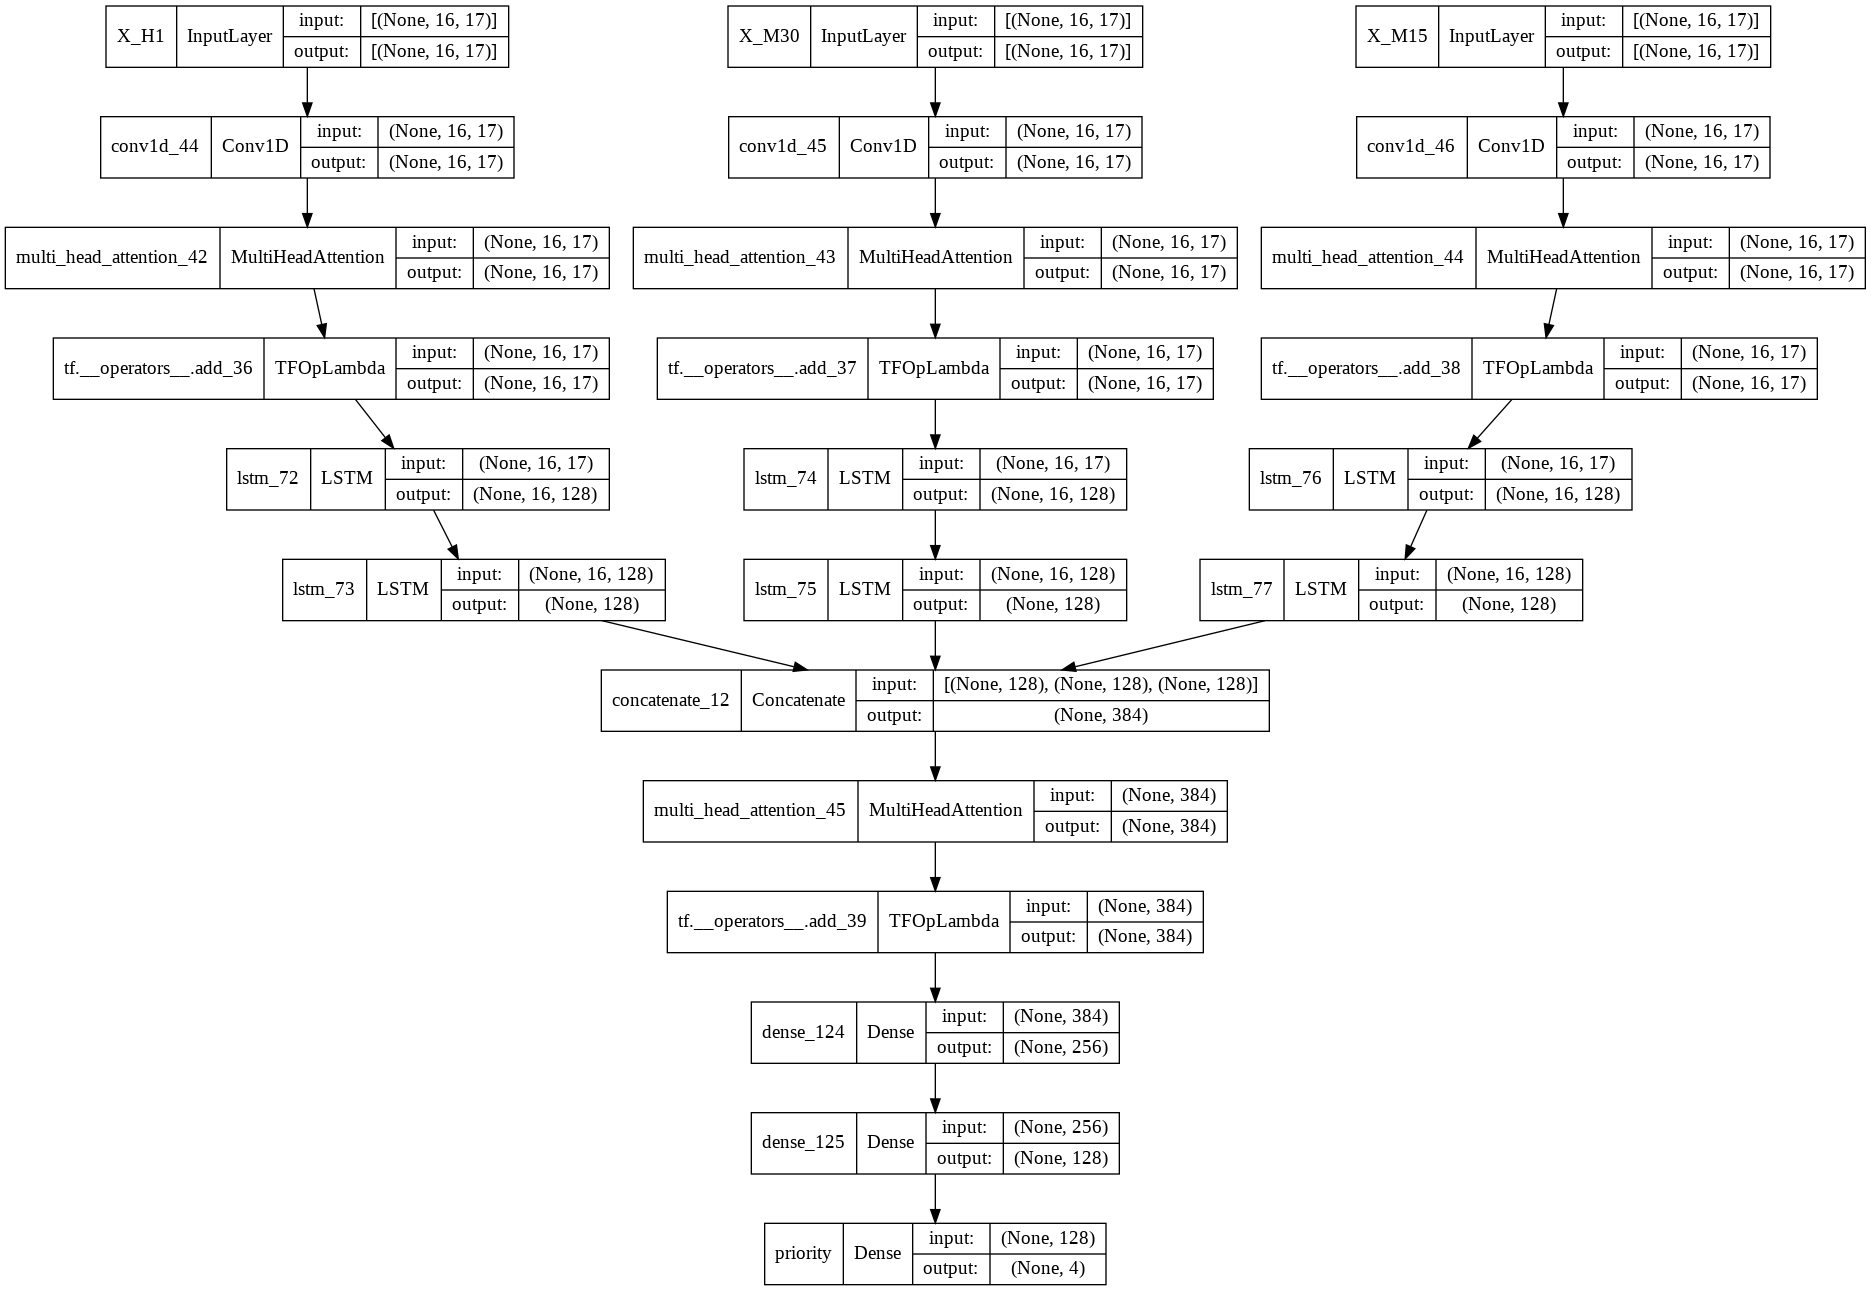

In [ ]:
from keras.layers.embeddings import Embedding
model2 = keras.Model(inputs=[inp_H1, inp_M30, inp_M15], outputs=[out])
keras.utils.plot_model(model2, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model2.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss={"priority": 'mean_squared_error',}
)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = os.path.join(r'/content/checkpoint/model_{epoch:03d}', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=20, min_delta=1e-8)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min',
                        min_delta=1e-8, cooldown=1, min_lr=1e-5)
mcp = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min') 

In [ ]:
model2.fit(
    {"X_H1": train_H1_X, "X_M30": train_m30_X, "X_M15": train_m15_X},{"priority": train_m15_y},
    epochs=100,
    batch_size=128,
    validation_data=({"X_H1": valid_H1_X, "X_M30": valid_m30_X, "X_M15": valid_m15_X}, {"priority": valid_m15_y}),
    callbacks=[mcp, rlp, es]
    # callbacks=[rlp, es]
    )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
437/437 [==============================] - ETA: 0s - loss: 0.0168
Epoch 00001: val_loss improved from inf to 0.00000, saving model to /content/checkpoint/model_001/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


437/437 [==============================] - 108s 212ms/step - loss: 0.0168 - val_loss: 4.2835e-06 - lr: 0.0010
Epoch 2/100
437/437 [==============================] - ETA: 0s - loss: 1.8555e-05
Epoch 00002: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_002/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_002/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_002/best_model_keras/assets


437/437 [==============================] - 93s 214ms/step - loss: 1.8555e-05 - val_loss: 3.5363e-06 - lr: 0.0010
Epoch 3/100
437/437 [==============================] - ETA: 0s - loss: 3.9212e-05
Epoch 00003: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 97ms/step - loss: 3.9212e-05 - val_loss: 5.5001e-05 - lr: 0.0010
Epoch 4/100
437/437 [==============================] - ETA: 0s - loss: 5.0427e-05
Epoch 00004: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 5.0427e-05 - val_loss: 1.4108e-05 - lr: 0.0010
Epoch 5/100
437/437 [==============================] - ETA: 0s - loss: 5.4856e-05
Epoch 00005: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 97ms/step - loss: 5.4856e-05 - val_loss: 8.8658e-05 - lr: 0.0010
Epoch 6/100
437/437 [==============================] - ETA: 0s - loss: 5.5578e-05
Epoch 00006: val_loss did not improve from 0.00000

Epoch 00006: Reduc

INFO:tensorflow:Assets written to: /content/checkpoint/model_007/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_007/best_model_keras/assets


437/437 [==============================] - 92s 212ms/step - loss: 3.4395e-06 - val_loss: 1.3640e-06 - lr: 5.0000e-04
Epoch 8/100
437/437 [==============================] - ETA: 0s - loss: 3.2389e-06
Epoch 00008: val_loss did not improve from 0.00000
437/437 [==============================] - 44s 100ms/step - loss: 3.2389e-06 - val_loss: 1.7830e-06 - lr: 5.0000e-04
Epoch 9/100
437/437 [==============================] - ETA: 0s - loss: 5.1078e-06
Epoch 00009: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 5.1078e-06 - val_loss: 6.5370e-06 - lr: 5.0000e-04
Epoch 10/100
437/437 [==============================] - ETA: 0s - loss: 3.8528e-05
Epoch 00010: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 95ms/step - loss: 3.8528e-05 - val_loss: 1.0514e-04 - lr: 5.0000e-04
Epoch 11/100
437/437 [==============================] - ETA: 0s - loss: 4.4933e-05
Epoch 00011: val_loss did not improve from 0.00000


INFO:tensorflow:Assets written to: /content/checkpoint/model_012/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_012/best_model_keras/assets


437/437 [==============================] - 91s 208ms/step - loss: 5.8059e-06 - val_loss: 1.3084e-06 - lr: 2.5000e-04
Epoch 13/100
437/437 [==============================] - ETA: 0s - loss: 3.1335e-06
Epoch 00013: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 95ms/step - loss: 3.1335e-06 - val_loss: 2.9561e-06 - lr: 2.5000e-04
Epoch 14/100
437/437 [==============================] - ETA: 0s - loss: 4.0010e-06
Epoch 00014: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 4.0010e-06 - val_loss: 1.2149e-05 - lr: 2.5000e-04
Epoch 15/100
437/437 [==============================] - ETA: 0s - loss: 1.6925e-05
Epoch 00015: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.6925e-05 - val_loss: 2.4019e-05 - lr: 2.5000e-04
Epoch 16/100
437/437 [==============================] - ETA: 0s - loss: 2.3372e-05
Epoch 00016: val_loss did not improve from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_017/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_017/best_model_keras/assets


437/437 [==============================] - 92s 211ms/step - loss: 3.0589e-06 - val_loss: 1.2114e-06 - lr: 1.2500e-04
Epoch 18/100
437/437 [==============================] - ETA: 0s - loss: 3.1021e-06
Epoch 00018: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 95ms/step - loss: 3.1021e-06 - val_loss: 2.3819e-06 - lr: 1.2500e-04
Epoch 19/100
437/437 [==============================] - ETA: 0s - loss: 3.5382e-06
Epoch 00019: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 3.5382e-06 - val_loss: 1.8434e-06 - lr: 1.2500e-04
Epoch 20/100
437/437 [==============================] - ETA: 0s - loss: 6.7365e-06
Epoch 00020: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 95ms/step - loss: 6.7365e-06 - val_loss: 2.6214e-05 - lr: 1.2500e-04
Epoch 21/100
437/437 [==============================] - ETA: 0s - loss: 1.0072e-05
Epoch 00021: val_loss did not improve from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_031/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_031/best_model_keras/assets


437/437 [==============================] - 91s 208ms/step - loss: 2.1706e-06 - val_loss: 1.0515e-06 - lr: 1.5625e-05
Epoch 32/100
437/437 [==============================] - ETA: 0s - loss: 2.2723e-06
Epoch 00032: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 2.2723e-06 - val_loss: 1.5894e-06 - lr: 1.5625e-05
Epoch 33/100
437/437 [==============================] - ETA: 0s - loss: 2.2876e-06
Epoch 00033: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 2.2876e-06 - val_loss: 1.1657e-06 - lr: 1.5625e-05
Epoch 34/100
437/437 [==============================] - ETA: 0s - loss: 2.2128e-06
Epoch 00034: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 97ms/step - loss: 2.2128e-06 - val_loss: 1.4000e-06 - lr: 1.5625e-05
Epoch 35/100
437/437 [==============================] - ETA: 0s - loss: 2.3046e-06
Epoch 00035: val_loss did not improve from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_043/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_043/best_model_keras/assets


437/437 [==============================] - 91s 208ms/step - loss: 2.0115e-06 - val_loss: 9.3302e-07 - lr: 1.0000e-05
Epoch 44/100
437/437 [==============================] - ETA: 0s - loss: 2.0200e-06
Epoch 00044: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 95ms/step - loss: 2.0200e-06 - val_loss: 1.2851e-06 - lr: 1.0000e-05
Epoch 45/100
437/437 [==============================] - ETA: 0s - loss: 1.9916e-06
Epoch 00045: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.9916e-06 - val_loss: 9.3476e-07 - lr: 1.0000e-05
Epoch 46/100
437/437 [==============================] - ETA: 0s - loss: 1.9181e-06
Epoch 00046: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.9181e-06 - val_loss: 1.0511e-06 - lr: 1.0000e-05
Epoch 47/100
437/437 [==============================] - ETA: 0s - loss: 1.9914e-06
Epoch 00047: val_loss did not improve from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_053/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_053/best_model_keras/assets


437/437 [==============================] - 91s 208ms/step - loss: 1.9476e-06 - val_loss: 9.2140e-07 - lr: 1.0000e-05
Epoch 54/100
437/437 [==============================] - ETA: 0s - loss: 1.8832e-06
Epoch 00054: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_054/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_054/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_054/best_model_keras/assets


437/437 [==============================] - 92s 211ms/step - loss: 1.8832e-06 - val_loss: 9.1957e-07 - lr: 1.0000e-05
Epoch 55/100
437/437 [==============================] - ETA: 0s - loss: 1.8925e-06
Epoch 00055: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_055/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_055/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_055/best_model_keras/assets


437/437 [==============================] - 92s 212ms/step - loss: 1.8925e-06 - val_loss: 8.9389e-07 - lr: 1.0000e-05
Epoch 56/100
437/437 [==============================] - ETA: 0s - loss: 1.8916e-06
Epoch 00056: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.8916e-06 - val_loss: 9.3284e-07 - lr: 1.0000e-05
Epoch 57/100
437/437 [==============================] - ETA: 0s - loss: 1.9745e-06
Epoch 00057: val_loss did not improve from 0.00000
437/437 [==============================] - 44s 100ms/step - loss: 1.9745e-06 - val_loss: 9.9521e-07 - lr: 1.0000e-05
Epoch 58/100
437/437 [==============================] - ETA: 0s - loss: 1.8328e-06
Epoch 00058: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.8328e-06 - val_loss: 9.7468e-07 - lr: 1.0000e-05
Epoch 59/100
437/437 [==============================] - ETA: 0s - loss: 1.9265e-06
Epoch 00059: val_loss did not improve from 0.0000

INFO:tensorflow:Assets written to: /content/checkpoint/model_064/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_064/best_model_keras/assets


437/437 [==============================] - 91s 208ms/step - loss: 1.8989e-06 - val_loss: 8.4768e-07 - lr: 1.0000e-05
Epoch 65/100
437/437 [==============================] - ETA: 0s - loss: 1.8141e-06
Epoch 00065: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 95ms/step - loss: 1.8141e-06 - val_loss: 1.3752e-06 - lr: 1.0000e-05
Epoch 66/100
437/437 [==============================] - ETA: 0s - loss: 1.8505e-06
Epoch 00066: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.8505e-06 - val_loss: 8.8416e-07 - lr: 1.0000e-05
Epoch 67/100
437/437 [==============================] - ETA: 0s - loss: 1.8566e-06
Epoch 00067: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.8566e-06 - val_loss: 8.8845e-07 - lr: 1.0000e-05
Epoch 68/100
437/437 [==============================] - ETA: 0s - loss: 1.8262e-06
Epoch 00068: val_loss did not improve from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_072/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_072/best_model_keras/assets


437/437 [==============================] - 91s 208ms/step - loss: 1.7818e-06 - val_loss: 8.4767e-07 - lr: 1.0000e-05
Epoch 73/100
437/437 [==============================] - ETA: 0s - loss: 1.7978e-06
Epoch 00073: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.7978e-06 - val_loss: 1.6151e-06 - lr: 1.0000e-05
Epoch 74/100
437/437 [==============================] - ETA: 0s - loss: 1.8769e-06
Epoch 00074: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.8769e-06 - val_loss: 9.6454e-07 - lr: 1.0000e-05
Epoch 75/100
437/437 [==============================] - ETA: 0s - loss: 1.7931e-06
Epoch 00075: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 97ms/step - loss: 1.7931e-06 - val_loss: 2.2318e-06 - lr: 1.0000e-05
Epoch 76/100
437/437 [==============================] - ETA: 0s - loss: 1.7806e-06
Epoch 00076: val_loss did not improve from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_079/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_079/best_model_keras/assets


437/437 [==============================] - 93s 213ms/step - loss: 1.7581e-06 - val_loss: 8.0082e-07 - lr: 1.0000e-05
Epoch 80/100
437/437 [==============================] - ETA: 0s - loss: 1.8031e-06
Epoch 00080: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_080/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_080/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_080/best_model_keras/assets


437/437 [==============================] - 92s 211ms/step - loss: 1.8031e-06 - val_loss: 7.9265e-07 - lr: 1.0000e-05
Epoch 81/100
437/437 [==============================] - ETA: 0s - loss: 1.8614e-06
Epoch 00081: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.8614e-06 - val_loss: 8.7320e-07 - lr: 1.0000e-05
Epoch 82/100
437/437 [==============================] - ETA: 0s - loss: 1.7859e-06
Epoch 00082: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 97ms/step - loss: 1.7859e-06 - val_loss: 9.5282e-07 - lr: 1.0000e-05
Epoch 83/100
437/437 [==============================] - ETA: 0s - loss: 1.7923e-06
Epoch 00083: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.7923e-06 - val_loss: 9.2009e-07 - lr: 1.0000e-05
Epoch 84/100
437/437 [==============================] - ETA: 0s - loss: 1.7398e-06
Epoch 00084: val_loss did not improve from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_094/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_094/best_model_keras/assets


437/437 [==============================] - 91s 208ms/step - loss: 1.7659e-06 - val_loss: 7.8457e-07 - lr: 1.0000e-05
Epoch 95/100
437/437 [==============================] - ETA: 0s - loss: 1.7564e-06
Epoch 00095: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.7564e-06 - val_loss: 1.0895e-06 - lr: 1.0000e-05
Epoch 96/100
437/437 [==============================] - ETA: 0s - loss: 1.7196e-06
Epoch 00096: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 96ms/step - loss: 1.7196e-06 - val_loss: 8.9164e-07 - lr: 1.0000e-05
Epoch 97/100
437/437 [==============================] - ETA: 0s - loss: 1.7945e-06
Epoch 00097: val_loss did not improve from 0.00000
437/437 [==============================] - 42s 97ms/step - loss: 1.7945e-06 - val_loss: 1.2192e-06 - lr: 1.0000e-05
Epoch 98/100
437/437 [==============================] - ETA: 0s - loss: 1.7511e-06
Epoch 00098: val_loss did not improve from 0.00000

# Load model to evaluate

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Downloading files
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd

In [89]:
gdd.download_file_from_google_drive(file_id='1KIl8RSpNYgEEBJHWbtvtgB0nZCkBIZjS',dest_path='./model.zip',unzip=True)
model_load = load_model(r'/content/model')
prd_price = model_load.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})

Unzipping...Done.


In [90]:
predict_price_inver= prd_price * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]
real_price = test_m15_y * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  6.692778660149227e-07
Root mean_squared_error =  0.000818094044725252
Explained_variance_score =  0.9984796990312887
R2_score =  0.9984289323253892


# Evaluate if you have train the model

In [ ]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model2 = load_model('checkpoint/model_094/best_model_keras')
prd_price = model2.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
predict_price_inver= prd_price * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

In [ ]:
real_price = test_m15_y * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

In [ ]:
print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  6.692777154051119e-07
Root mean_squared_error =  0.0008180939526760431
Explained_variance_score =  0.998479700618842
R2_score =  0.9984289326789317
